In [1]:
# News Article Classification Project
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
# 2. Load and Inspect Dataset

data = pd.read_csv("data_news.csv")  # Ensure this file is in your working directory
data = data[["category", "headline", "short_description"]].dropna()
data["text"] = data["headline"] + " " + data["short_description"]
data = data[["category", "text"]]

print("\nDataset Sample:")
print(data.head())




Dataset Sample:
   category                                               text
0  WELLNESS  143 Miles in 35 Days: Lessons Learned Resting ...
1  WELLNESS  Talking to Yourself: Crazy or Crazy Helpful? T...
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...
3  WELLNESS  Oh, What a Difference She Made If you want to ...
4  WELLNESS  Green Superfoods First, the bad news: Soda bre...


In [3]:
# 3. Preprocessing Function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

data["clean_text"] = data["text"].apply(preprocess)



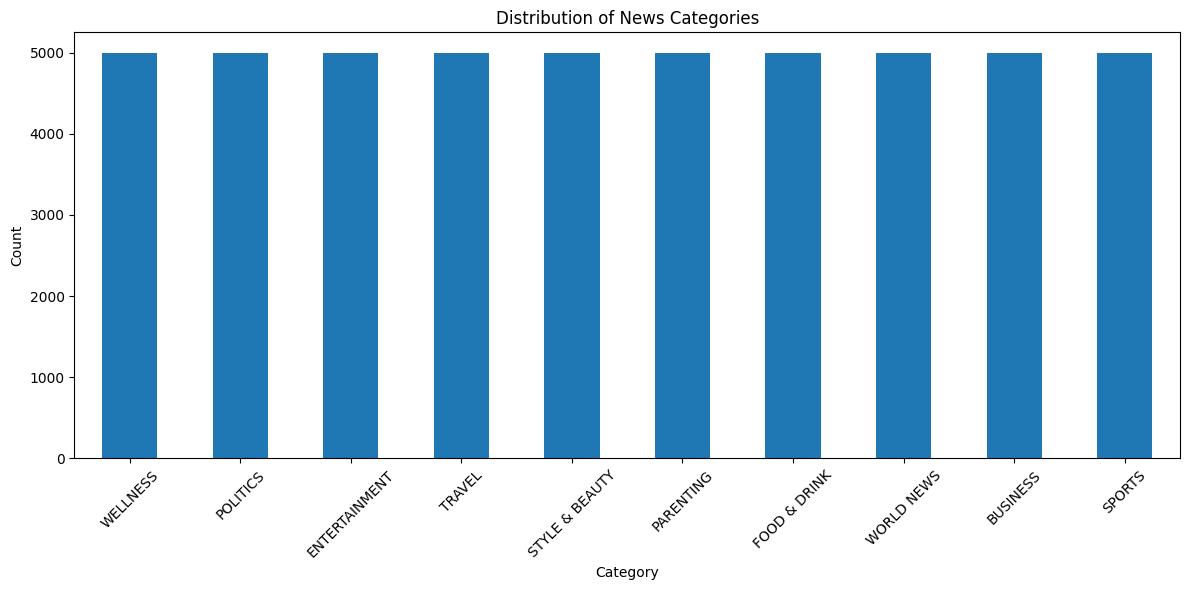

In [4]:
# 4. Exploratory Data Analysis
plt.figure(figsize=(12, 6))
data["category"].value_counts().plot(kind='bar')
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
# 5. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(data["clean_text"])
y = data["category"]



In [6]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)





Logistic Regression Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.75      0.76      0.75      1000
 ENTERTAINMENT       0.77      0.77      0.77      1000
  FOOD & DRINK       0.84      0.86      0.85      1000
     PARENTING       0.76      0.76      0.76      1000
      POLITICS       0.76      0.75      0.75      1000
        SPORTS       0.88      0.89      0.88      1000
STYLE & BEAUTY       0.88      0.82      0.85      1000
        TRAVEL       0.78      0.78      0.78      1000
      WELLNESS       0.71      0.76      0.74      1000
    WORLD NEWS       0.81      0.78      0.80      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000

Accuracy: 0.7922
F1 Score: 0.7924


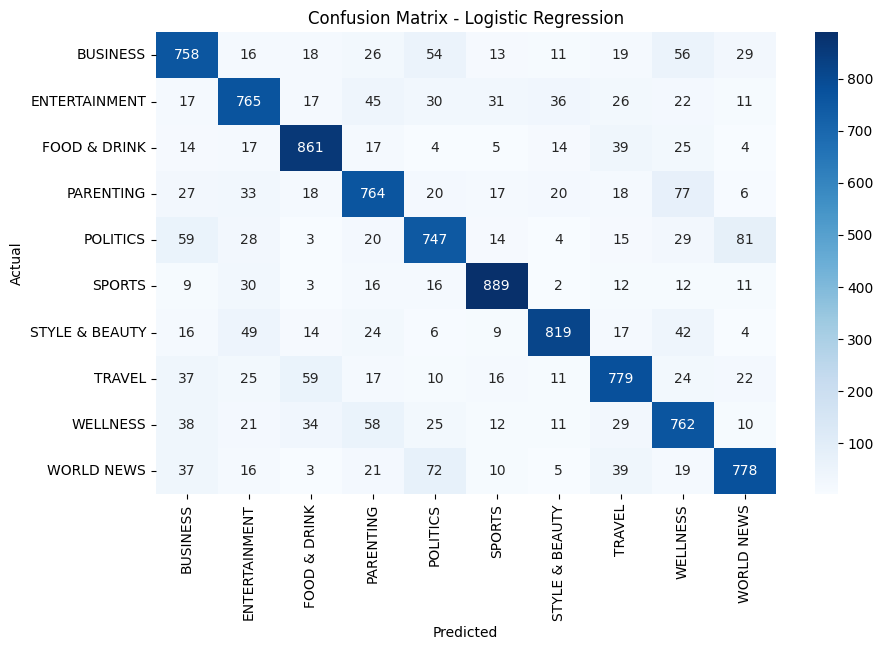


Naive Bayes Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.74      0.71      0.72      1000
 ENTERTAINMENT       0.78      0.75      0.76      1000
  FOOD & DRINK       0.79      0.86      0.82      1000
     PARENTING       0.67      0.77      0.72      1000
      POLITICS       0.76      0.72      0.74      1000
        SPORTS       0.87      0.83      0.85      1000
STYLE & BEAUTY       0.89      0.80      0.84      1000
        TRAVEL       0.76      0.78      0.77      1000
      WELLNESS       0.70      0.72      0.71      1000
    WORLD NEWS       0.79      0.79      0.79      1000

      accuracy                           0.77     10000
     macro avg       0.78      0.77      0.77     10000
  weighted avg       0.78      0.77      0.77     10000

Accuracy: 0.7726
F1 Score: 0.7732


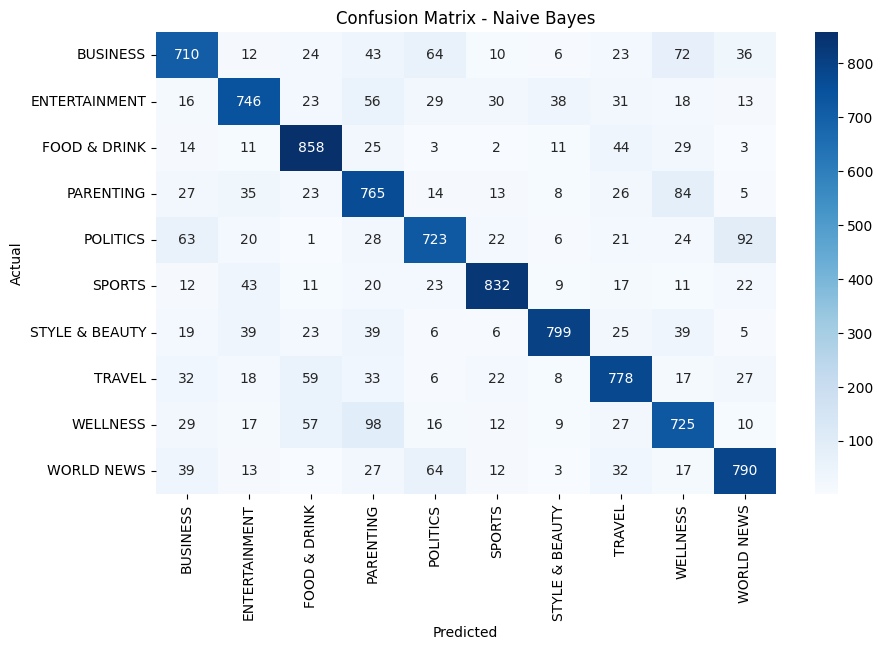


Support Vector Machine Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.80      0.78      1000
 ENTERTAINMENT       0.78      0.76      0.77      1000
  FOOD & DRINK       0.81      0.85      0.83      1000
     PARENTING       0.75      0.76      0.76      1000
      POLITICS       0.77      0.74      0.75      1000
        SPORTS       0.87      0.91      0.89      1000
STYLE & BEAUTY       0.86      0.85      0.86      1000
        TRAVEL       0.78      0.77      0.78      1000
      WELLNESS       0.72      0.73      0.73      1000
    WORLD NEWS       0.81      0.76      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000

Accuracy: 0.7919
F1 Score: 0.7916


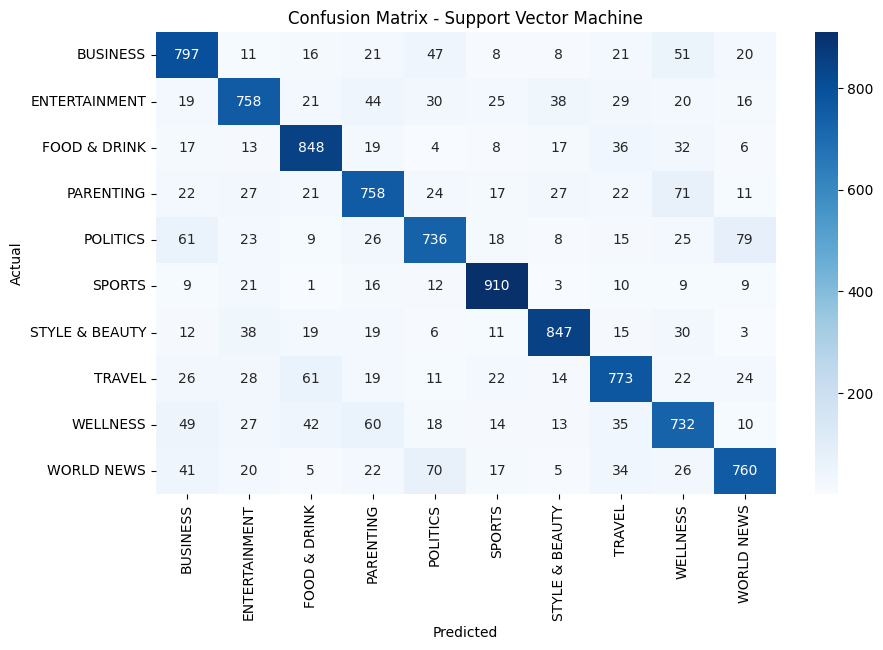

In [7]:
# 7. Model Training & Evaluation
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, "Logistic Regression")

# Multinomial Naive Bayes
nb = MultinomialNB()
evaluate_model(nb, "Naive Bayes")

# Support Vector Machine
svm = LinearSVC()
evaluate_model(svm, "Support Vector Machine")



In [8]:
# 8. Cross-Validation
scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"\nSVM Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")



SVM Cross-Validation Accuracy: 0.7659 +/- 0.0028


In [9]:
import joblib # best model
joblib.dump(svm, "best_news_classifier.pkl")


['best_news_classifier.pkl']

In [10]:

# 10. Predict on New Example
def classify_new_article(text):
    clean = preprocess(text)
    vec = vectorizer.transform([clean])
    pred = svm.predict(vec)
    return pred[0]

# Example usage
print("\nPredicted Category:", classify_new_article("Apple releases latest iPhone with AI camera"))


Predicted Category: BUSINESS
